INSTALL LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn. preprocessing import MinMaxScaler
from sklearn. metrics import mean_squared_error
from statsmodels.graphics. tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
!pip install pmdarima

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
            

UPLOAD FILE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/Energy_consumption.csv')

**EXPLORATIVE DATA ANALYSIS(EDA)**

Before making predictions,EDA is important for better understand the dataset's structure and patterns.

In [ ]:
display(df.head())
display(df.info())

,Date,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
0,29/03/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.800003,31.200001,31.650002,30.600000,32.850002,31.050003,32.100002,31.350002,31.650002,30.150002
1,30/03/2011,32.100002,32.400002,33.600002,33.000000,29.700001,30.900002,31.500002,33.000000,31.500000,...,35.700001,33.600002,34.200001,34.800003,34.650002,33.750000,33.150002,32.700001,31.500002,33.600002
2,31/03/2011,32.100002,33.600002,35.100002,33.450001,31.200001,31.350000,34.200001,33.750000,34.650002,...,33.000000,33.000000,35.250000,34.350002,32.400002,31.200001,32.849998,33.450001,32.100002,32.100002
3,01/04/2011,32.700001,34.500000,30.300003,33.000000,33.000000,31.500000,30.300003,32.849998,33.150002,...,32.250000,33.450001,33.000000,30.450001,33.150002,30.600002,30.150002,32.550003,33.000000,30.150002
4,02/04/2011,31.800001,32.400002,30.450001,33.900002,33.300003,30.750002,30.750000,29.850000,28.800001,...,34.500000,31.800001,32.100002,31.800001,35.250000,34.650002,30.450001,31.500000,33.450001,32.550003


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 97 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    695 non-null    object 
 1   00:00   694 non-null    float64
 2   00:15   694 non-null    float64
 3   00:30   694 non-null    float64
 4   00:45   692 non-null    float64
 5   01:00   692 non-null    float64
 6   01:15   692 non-null    float64
 7   01:30   692 non-null    float64
 8   01:45   694 non-null    float64
 9   02:00   694 non-null    float64
 10  02:15   694 non-null    float64
 11  02:30   694 non-null    float64
 12  02:45   694 non-null    float64
 13  03:00   694 non-null    float64
 14  03:15   694 non-null    float64
 15  03:30   694 non-null    float64
 16  03:45   694 non-null    float64
 17  04:00   694 non-null    float64
 18  04:15   694 non-null    float64
 19  04:30   694 non-null    float64
 20  04:45   694 non-null    float64
 21  05:00   694 non-null    float64
 22  05

None

In [ ]:
print(df.shape)
print(len(df))
print(len(df.columns))


(695, 97)
695
97


**DATA PREPROCESSING**

in dataset dates are not numerical and i need numerical values like electricity usage, sub meters readings etc. moreover some rows have missing or invalid values so i clean dataset by dropping all missing values to ensure dataset (time series)is complete and without gaps. for more easier work on dataset and easily apply maths formulas i convert panda data frame to numpy array. instead of having multiple columns,i have a single sequence time series data set.

In [ ]:

df = pd.read_csv('/content/Energy_consumption.csv')

#energy consumption in 15 minute intervels for each day
df = df.dropna()
df = df.drop('Date', axis=1)
df_val = df.values
dataset=np.sum(df_val, axis=1, dtype= float)
display(dataset)

array([4981.5001927 , 5166.60016445, 3046.35014537, 3101.10013769,
       4908.60016439, 4858.50017742, 4905.00019836, 4999.95019526,
       3075.90013122, 3023.5501442 , 5004.6001587 , 5199.30019957,
       5226.75017163, 5162.55022428, 4991.55017468, 2950.20010378,
       4883.85017776, 5055.15017129, 5084.10021592, 4914.00019451,
       3581.55014991, 2981.55008892, 2967.00011064, 3515.70014566,
       4721.10016438, 4931.85019494, 5020.05018234, 4799.40017322,
       3043.20012856, 2929.05012318, 3423.45014192, 4949.55017475,
       5155.05015188, 5238.75021174, 5129.10016059, 3088.95013995,
       3017.40010454, 5041.95018196, 5170.80017096, 5250.90023994,
       5239.35021975, 5163.60019308, 3169.65013694, 3034.65012932,
       5056.05021094, 5052.6001988 , 5048.2501869 , 4971.75019264,
       3013.20013239, 2919.45011703, 4830.0002022 , 5007.90018087,
       5028.00018885, 5088.60017207, 5092.35015869, 3069.90011787,
       2909.85011099, 4923.60022544, 5136.75021744, 5233.65021

convert Date time column to date time object and  set Date time column as Data Frame index

In [ ]:
df = pd.read_csv('/content/Energy_consumption.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df.set_index('Date')
display(df.head())

,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,02:15,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
Date,,,,,,,,,,,,,,,,,,,,,
2011-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.800003,31.200001,31.650002,30.600000,32.850002,31.050003,32.100002,31.350002,31.650002,30.150002
2011-03-30,32.100002,32.400002,33.600002,33.000000,29.700001,30.900002,31.500002,33.000000,31.500000,30.000002,...,35.700001,33.600002,34.200001,34.800003,34.650002,33.750000,33.150002,32.700001,31.500002,33.600002
2011-03-31,32.100002,33.600002,35.100002,33.450001,31.200001,31.350000,34.200001,33.750000,34.650002,35.250000,...,33.000000,33.000000,35.250000,34.350002,32.400002,31.200001,32.849998,33.450001,32.100002,32.100002
2011-04-01,32.700001,34.500000,30.300003,33.000000,33.000000,31.500000,30.300003,32.849998,33.150002,32.700001,...,32.250000,33.450001,33.000000,30.450001,33.150002,30.600002,30.150002,32.550003,33.000000,30.150002
2011-04-02,31.800001,32.400002,30.450001,33.900002,33.300003,30.750002,30.750000,29.850000,28.800001,33.450001,...,34.500000,31.800001,32.100002,31.800001,35.250000,34.650002,30.450001,31.500000,33.450001,32.550003


**Data Visulization**

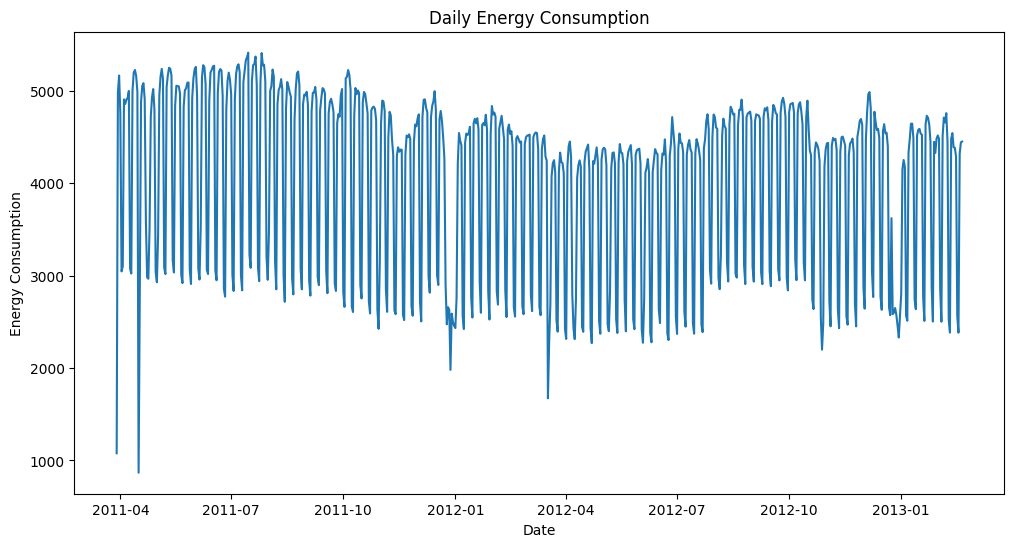

In [ ]:
df_daily = df.sum(axis=1)
plt.figure(figsize=(12, 6))
plt.plot(df_daily)
plt.title('Daily Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.show()

**Check Stationary**

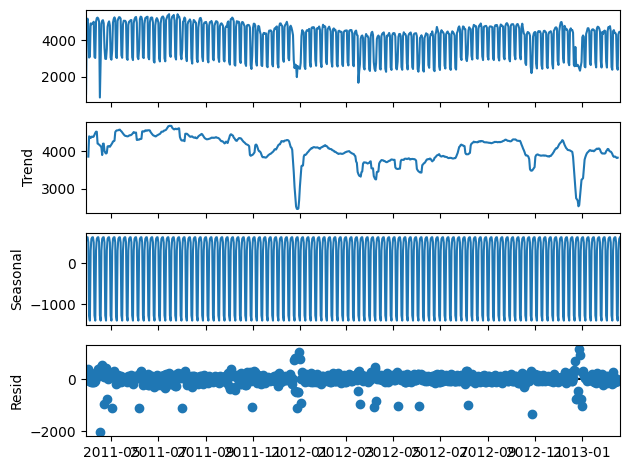

In [ ]:
decomposition = seasonal_decompose(df_daily, model="additive", period=7)
decomposition.plot()
plt.show()

**Perform Differencing**

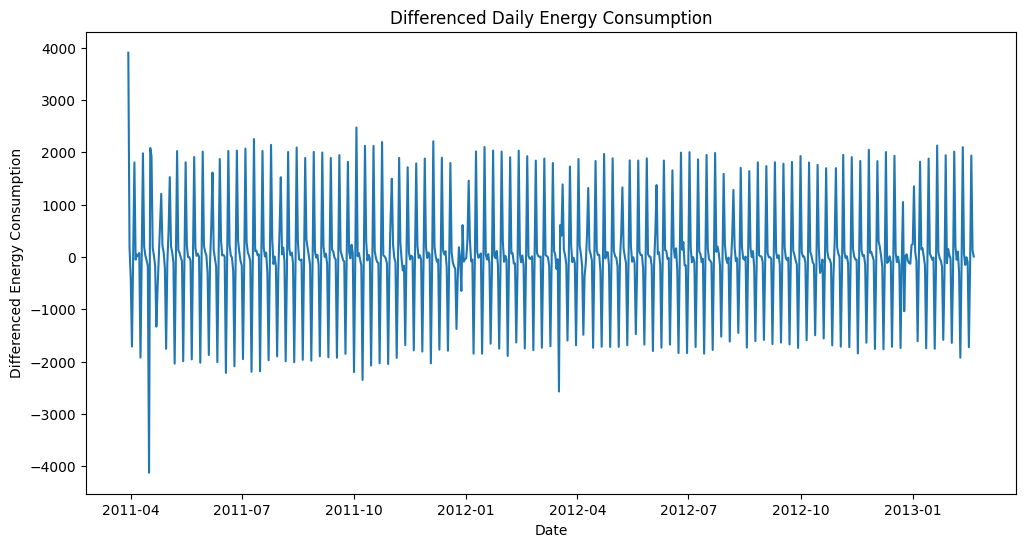

In [ ]:
df_daily_diff = df_daily.diff().dropna()

plt.figure(figsize=(12, 6))
plt.plot(df_daily_diff)
plt.title('Differenced Daily Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Differenced Energy Consumption')
plt.show()

Energy Consumed per day

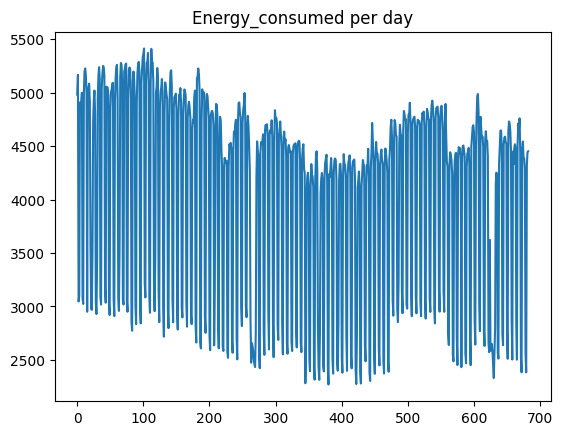

In [ ]:
plt.plot(dataset)
plt.title('Energy_consumed per day')
plt.show()

**ARIMA SARIMA MODEL**

ADF TEST

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_daily)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.754580
p-value: 0.065060
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


ACF &PACF

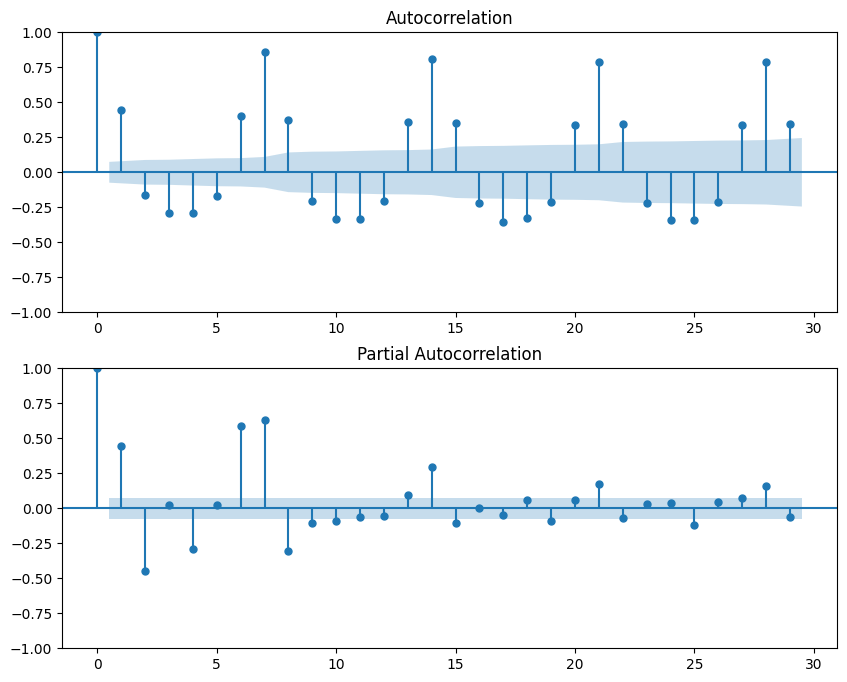

In [ ]:
# Plot ACF and PACF for daily energy consumption
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(df_daily, ax=axes[0])
plot_pacf(df_daily, ax=axes[1])

plt.show()

**Model fitting and validation**

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


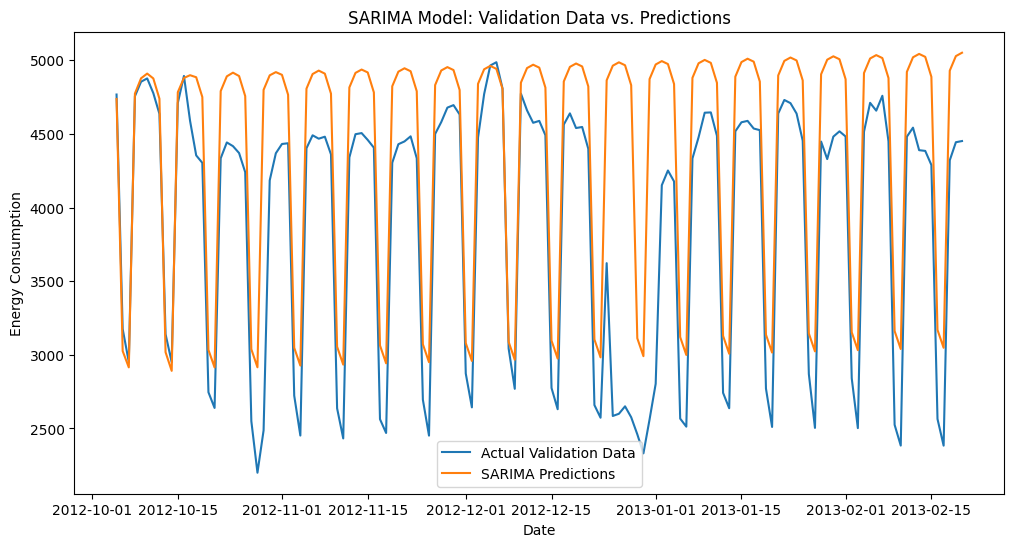

In [ ]:
# Split data into training and validation sets
train_size = int(len(df_daily) * 0.8)
train_data, validation_data = df_daily[0:train_size], df_daily[train_size:]

# Fit a SARIMA model
# Using the parameters from the previous successful SARIMA fit
model_sarima = SARIMAX(train_data, order=(5, 1, 0), seasonal_order=(1, 1, 0, 7))
sarima_fit = model_sarima.fit()

# Make predictions on the validation set
predictions = sarima_fit.predict(start=len(train_data), end=len(df_daily)-1)

# Plot validation data vs. predictions
plt.figure(figsize=(12, 6))
plt.plot(validation_data.index, validation_data, label='Actual Validation Data')
plt.plot(validation_data.index, predictions, label='SARIMA Predictions')
plt.title('SARIMA Model: Validation Data vs. Predictions')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

Future Forcasting with Confidence Intervels

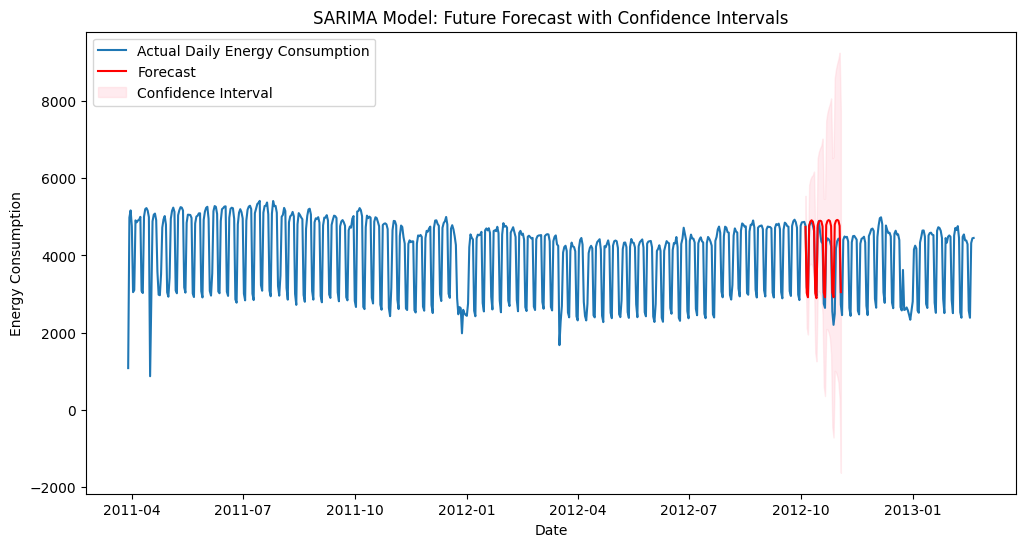

In [ ]:
# Forecast future values with confidence intervals
forecast_steps = 30  # You can adjust the number of steps to forecast
forecast_result = sarima_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast_result.predicted_mean
forecast_conf_int = forecast_result.conf_int()

# Plot the forecast with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily, label='Actual Daily Energy Consumption')
plt.plot(forecast_mean.index, forecast_mean, color='red', label='Forecast')
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')

plt.title('SARIMA Model: Future Forecast with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

PERFORMANCE EVALUATION RMSE & MSE

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(validation_data, predictions)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 452410.8369795337
Root Mean Squared Error (RMSE): 672.6149247374263


Data Scaling and Sequence Prepration

In [ ]:
dataset = df_daily.values
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 10
X, y = create_dataset(dataset, time_step)

X = X.reshape(X.shape[0], X.shape[1], 1)

LSTM MODEL

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Training and Split

In [ ]:
train_size = int(len(dataset) * 0.8)
X_train, X_val = X[0:train_size], X[train_size:]
y_train, y_val = y[0:train_size], y[train_size:]

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.3707 - val_loss: 0.0685
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0598 - val_loss: 0.0409
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0456 - val_loss: 0.0424
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0535 - val_loss: 0.0418
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0476 - val_loss: 0.0413
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0446 - val_loss: 0.0405
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0476 - val_loss: 0.0428
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0475 - val_loss: 0.0404
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0493 - val_loss: 0.0408
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0463 - val_loss: 0.0405
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0444 - val_loss: 0.0402
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0

Prediction and inverse scaling

In [ ]:
lstm_predictions = model.predict(X_val)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
y_val_actual = scaler.inverse_transform(y_val.reshape(-1, 1))

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step 


In [ ]:
lstm_mse = mean_squared_error(y_val_actual, lstm_predictions)
lstm_rmse = np.sqrt(lstm_mse)

print(f'LSTM Mean Squared Error (MSE): {lstm_mse}')
print(f'LSTM Root Mean Squared Error (RMSE): {lstm_rmse}')

print("\nSARIMA Model Performance:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

print("\nPerformance Comparison:")
if lstm_rmse < rmse:
    print("The LSTM model performed better than the SARIMA model based on RMSE.")
elif lstm_rmse > rmse:
    print("The SARIMA model performed better than the LSTM model based on RMSE.")
else:
    print("The LSTM and SARIMA models performed similarly based on RMSE.")

LSTM Mean Squared Error (MSE): 312429.17328461865
LSTM Root Mean Squared Error (RMSE): 558.9536414449938

SARIMA Model Performance:
Mean Squared Error (MSE): 452410.8369795337
Root Mean Squared Error (RMSE): 672.6149247374263

Performance Comparison:
The LSTM model performed better than the SARIMA model based on RMSE.


## Summary:

### Data Analysis Key Findings

*   The LSTM model achieved a Mean Squared Error (MSE) of approximately 312,429.17 and a Root Mean Squared Error (RMSE) of approximately 558.95 on the validation data.
*   The previously calculated SARIMA model had an MSE of approximately 452,410.84 and an RMSE of approximately 672.61.
*   Based on the calculated MSE and RMSE values, the LSTM model demonstrated better performance than the SARIMA model.

### Insights or Next Steps

*   The LSTM model's superior performance suggests it may be more suitable for forecasting future energy consumption based on the provided data and model configurations.
*   Further refinement of the LSTM model (e.g., hyperparameter tuning, different architectures) or exploration of other deep learning models could potentially lead to even better forecasting accuracy.
